<img src="./image/b1.png" width="800">


# 🚀 Rocket Flight Simulation: Physics-Based Trajectory Modeling

# 1. Overview
Simulation models the trajectory of a rocket in 2D space considering thrust, gravity, and changing mass due to fuel consumption. Below is a detailed mathematical and conceptual breakdown of the simulation.The simulation models the motion of a rocket using Newtonian physics, where:

- Thrust accelerates the rocket until fuel runs out.
- Gravity constantly pulls the rocket downward.
- The rocket follows a parabolic trajectory, reaching max altitude before falling back.
- Fuel burns over time, reducing the rocket’s mass and acceleration.

This follows two main phases:
- Powered flight (thrust applied) → Rocket ascends.
- Coasting/free-fall (no thrust) → Rocket slows down, peaks, then falls.

## 2. Mathematical Formulation

### 2.1 Forces Acting on the Rocket

The motion of the rocket is governed by **Newton's Second Law**:

$$
F = m a
$$

where:

- \( F \) is the **net force** acting on the rocket,
- \( m \) is the **mass of the rocket**, which decreases as fuel burns,
- \( a \) is the **acceleration** of the rocket.

### **Forces in the Vertical (Y) Direction**
The forces acting on the rocket in the **Y-direction**:

$$
F_y = T \cos(\theta) - mg
$$

where:

- \( T \) = **thrust force** (decreases when fuel runs out),
- \( g \) = **gravitational acceleration** (9.81 m/s²),
- \( \theta \) = **angle of the rocket**.

### **Forces in the Horizontal (X) Direction**
The forces acting on the rocket in the **X-direction**:

$$
F_x = T \sin(\theta)
$$

### **Acceleration Equations Using Newton’s Second Law**
Applying Newton’s Second Law to each direction:

#### **Horizontal Acceleration (X-Direction)**:
$$
a_x = \frac{F_x}{m} = \frac{T \sin(\theta)}{m}
$$

#### **Vertical Acceleration (Y-Direction)**:
$$
a_y = \frac{F_y}{m} = \frac{T \cos(\theta)}{m} - g
$$

where:
- $a_x$ = **horizontal acceleration** (m/s²),
- $a_y$ = **vertical acceleration** (m/s²),
- $F_x = T \sin(\theta)$ is the **horizontal component** of thrust,
- $F_y = T \cos(\theta) - mg$ is the **net vertical force**,
- $T$ = **thrust force** (N),
- $m$ = **mass of the rocket** (kg),
- $g$ = **gravitational acceleration** (9.81 m/s²),
- $\theta$ = **rocket’s angle** with respect to the horizontal.

---

### 2.2 Velocity Updates
Velocity is updated using the **kinematics equations**:

$$
v_x = v_x + a_x \cdot dt
$$

$$
v_y = v_y + a_y \cdot dt
$$

where:
- $v_x, v_y$ = **velocity components** (m/s),
- $a_x, a_y$ = **acceleration components** (m/s²),
- $dt$ = **small time step** for numerical integration.

---

### 2.3 Position Updates
The **position** of the rocket is updated using:

$$
x = x + v_x \cdot dt
$$

$$
y = y + v_y \cdot dt
$$

where:
- $x, y$ = **position of the rocket** (m).

---

### 2.4 Mass Decrease Due to Fuel Burn
The **mass of the rocket** decreases over time as fuel burns:

$$
m(t) = m_0 - \dot{m} t
$$

where:
- $m_0$ = **initial mass** (including fuel),
- $\dot{m}$ = **fuel burn rate per second** (kg/s),
- $t$ = **elapsed time** (s).

Once the fuel is depleted, the **mass remains constant**:

$$
m = m_{\text{empty}} + m_{\text{payload}}
$$

where:
- $m_{\text{empty}}$ = **empty mass of the rocket** (kg),
- $m_{\text{payload}}$ = **payload mass** (kg).

---

### 2.5 Angle Adjustment During Thrust
The rocket’s **angle** $\theta$ changes over time as:

$$
\theta(t) = \theta_{\text{initial}} + \text{angle variation} \cdot dt
$$

Once the rocket **stops thrusting**, its angle is determined by its **velocity components**:

$$
\theta = \tan^{-1} \left(\frac{v_x}{v_y}\right)
$$

where:
- $\theta$ = **rocket’s current angle** (degrees),
- $v_x, v_y$ = **velocity components** (m/s).

---



## 3. Simulation Steps

Each iteration of the simulation follows these steps:

- Compute the forces acting on the rocket.
- Update acceleration using Newton’s second law.
- Update velocity using kinematic equations.
- Update position using velocity.
- Decrease mass if fuel is burning.
- Adjust angle if needed.
- Stop simulation if the rocket hits the ground.


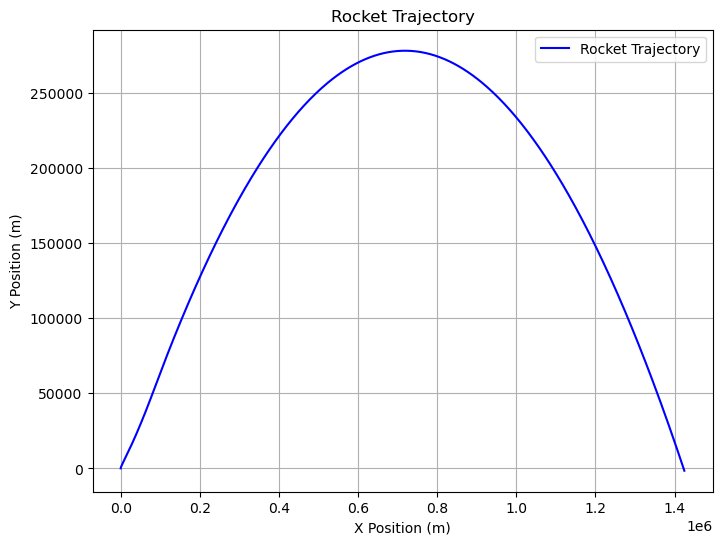

In [1]:
import math
import pandas as pd
import matplotlib.pyplot as plt

# Initial Parameters
Weighttotal = 6200  # Total initial weight of the rocket (kg)
Thrust = 120  # Thrust force (kN)
Fuel = 5200  # Fuel mass (kg)
Emptyweight = 550  # Rocket weight without fuel (kg)
Rocketduration = 90  # Burn time (s)
Angle = 45  # Launch angle (degrees)
Payload = 450  # Payload weight (kg)
Anglevariation = 4.2  # Angle adjustment per second (degrees)
Timeadvance = 1  # Simulation time step (seconds)

# Variables for Simulation
anglecurrent = 0
a1 = anglecurrent
a1s = Anglevariation
w1 = Weighttotal
timef = 10000
sx1 = 0  # Initial X position
sy1 = 0  # Initial Y position
s1 = 0  # Initial speed
deltamass = Fuel / Rocketduration  # Fuel burn rate per second
timek = 0
simulation = 1
dtimek = Timeadvance
anglespeed = Anglevariation
rocketactive = 1
Thrust1 = Thrust

# Initialize velocity
vx, vy = 0, 0

# Data storage
ptimek, psx1, psy1, ps1, pa1, pw1 = [], [], [], [], [], []

# Simulation Loop
while simulation == 1:
    Thrust1 = Thrust if rocketactive else 0

    # Update mass
    if timek <= Rocketduration:
        rocketactive = 1
        w1 = w1 - deltamass * dtimek
        if w1 <= Payload:
            w1 = Payload
    else:
        rocketactive = 0
        w1 = Payload

    # Adjust angle
    if rocketactive == 1:
        if a1 < Angle:
            a1 = min(a1 + anglespeed * dtimek, Angle)
        elif a1 > Angle:
            a1 = max(a1 - anglespeed * dtimek, Angle)
    else:
        # Safe atan2 for angle calculation
        a1 = math.atan2(vx, vy) * 180 / math.pi

    # Ensure mass is always positive
    m0 = max(w1, 1)

    # Gravity and acceleration
    g1 = 9.81
    acc1 = (Thrust1 / m0) * 1000

    # Velocity updates
    vy = vy + dtimek * acc1 * math.cos(math.radians(a1)) - g1 * dtimek
    vx = vx + dtimek * acc1 * math.sin(math.radians(a1))
    s1 = math.sqrt(vx**2 + vy**2)

    # Position updates
    sx1 += vx * dtimek
    sy1 += vy * dtimek

    # Stop simulation if rocket hits the ground
    if sy1 <= 0 or timek > timef:
        simulation = 0

    # Store Data
    timek += dtimek
    ptimek.append(timek)
    psx1.append(sx1)
    psy1.append(sy1)
    ps1.append(s1)
    pa1.append(a1)
    pw1.append(w1)

# Convert to DataFrame
dict_1 = {'Time': ptimek, 'X_position': psx1, 'Y_position': psy1, 'Speed': ps1, 'Angle': pa1, 'Weight': pw1}
df = pd.DataFrame(dict_1)

# Plot Trajectory
plt.figure(figsize=(8, 6))
plt.plot(psx1, psy1, label="Rocket Trajectory", color="b")
plt.xlabel("X Position (m)")
plt.ylabel("Y Position (m)")
plt.title("Rocket Trajectory")
plt.legend()
plt.grid()
plt.show()


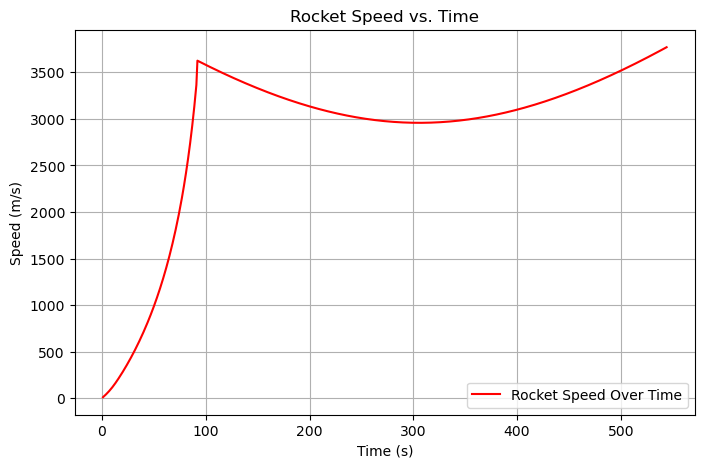

In [2]:
plt.figure(figsize=(8, 5))
plt.plot(ptimek, ps1, label="Rocket Speed Over Time", color="r")
plt.xlabel("Time (s)")
plt.ylabel("Speed (m/s)")
plt.title("Rocket Speed vs. Time")
plt.legend()
plt.grid()
plt.show()


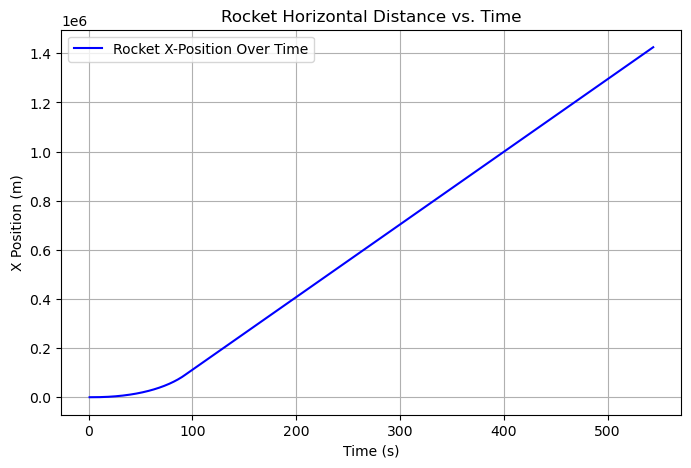

In [3]:
plt.figure(figsize=(8, 5))
plt.plot(ptimek, psx1, label="Rocket X-Position Over Time", color="b")
plt.xlabel("Time (s)")
plt.ylabel("X Position (m)")
plt.title("Rocket Horizontal Distance vs. Time")
plt.legend()
plt.grid()
plt.show()


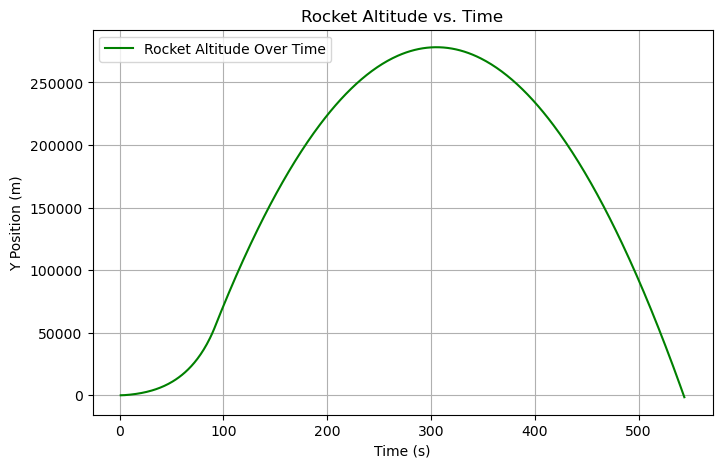

In [5]:
plt.figure(figsize=(8, 5))
plt.plot(ptimek, psy1, label="Rocket Altitude Over Time", color="g")
plt.xlabel("Time (s)")
plt.ylabel("Y Position (m)")
plt.title("Rocket Altitude vs. Time")
plt.legend()
plt.grid()
plt.show()


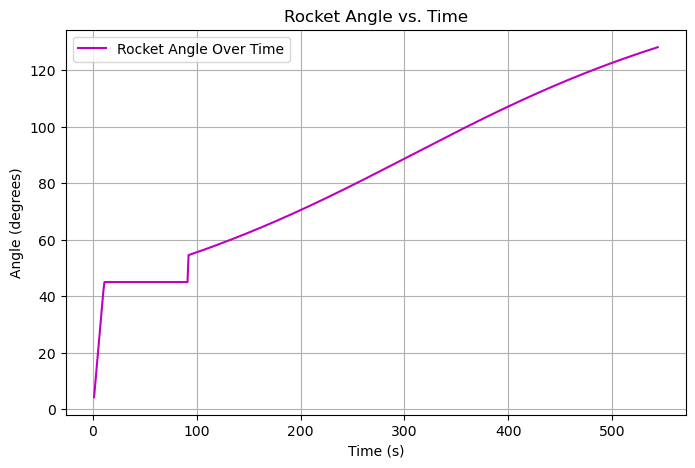

In [6]:
plt.figure(figsize=(8, 5))
plt.plot(ptimek, pa1, label="Rocket Angle Over Time", color="m")
plt.xlabel("Time (s)")
plt.ylabel("Angle (degrees)")
plt.title("Rocket Angle vs. Time")
plt.legend()
plt.grid()
plt.show()


## Additional Improvements

### 🚀 Add Air Resistance
- Include **drag force** to simulate aerodynamic effects.
- The drag force is given by:

  $$
  F_{\text{drag}} = \frac{1}{2} C_d \rho A v^2
  $$

  where:
  - $C_d$ = **drag coefficient** (depends on rocket shape),
  - $\rho$ = **air density** (kg/m³, varies with altitude),
  - $A$ = **cross-sectional area** (m²),
  - $v$ = **velocity** (m/s).

---

### 🌍 Variable Gravity
- Instead of assuming a **constant gravitational acceleration** (\( g = 9.81 \) m/s²), use **altitude-based gravity**:

  $$
  g(h) = \frac{G M}{(R + h)^2}
  $$

  where:
  - $G$ = **gravitational constant** (\(6.674 \times 10^{-11} \) m³/kg/s²),
  - $M$ = **mass of Earth** (\(5.972 \times 10^{24}\) kg),
  - $R$ = **radius of Earth** (~6,371 km),
  - $h$ = **altitude of the rocket** (m).

---

### 🚀 Multiple Stages
- Model **rocket staging** like real rockets:
  - When a **stage runs out of fuel**, it is **detached**, reducing the rocket’s mass.
  - The next stage **ignites**, providing new thrust.
  - Helps improve **efficiency** by discarding unnecessary weight.

